# Smoothing Maps with Gaussian Beam Convolution
This notebook apples a gaussian beam convolution to the intensity maps to replicate the effects of limited resolution of telescopes in real data. <br/> 
This was done using the smoothimage() function which was adapted from: https://github.com/IntensityTools/MultipoleExpansion/blob/master/teletools.py <br/> 
In this case the smoothing was applied to the data using a beam size of 1 degree.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

from smoothing import smoothimage #import smooth image function 

In [16]:
%matplotlib inline

font = {"size": 16, "family": "STIXGeneral"}
axislabelfontsize = "x-large"
plt.rc("font", **font)
plt.rcParams["text.usetex"] = True

In [17]:
#Load in the data 
T_HI = np.load('MultiDarkSims/dT_HI.npy')    #HI intensity map
T_FG = np.load('MultiDarkSims/dT_FG.npy')     #foreground map
nx,ny,nz = np.shape(T_HI)

In [18]:
#combine signal and foreground
T_ALL = T_HI + T_FG

In [6]:
n = 0 #value of nz to smooth
lx, ly, lz = 29, 29, 29 
sig = 1  #beam size in degrees

image = T_ALL[:,:,n]
image1 =T_HI[:,:,n]

In [19]:
#smoothing applied to the images
smoothed_image = smoothimage(image,lx,ly,nx,ny,sig)
smoothed_image1 = smoothimage(image1,lx,ly,nx,ny,sig)

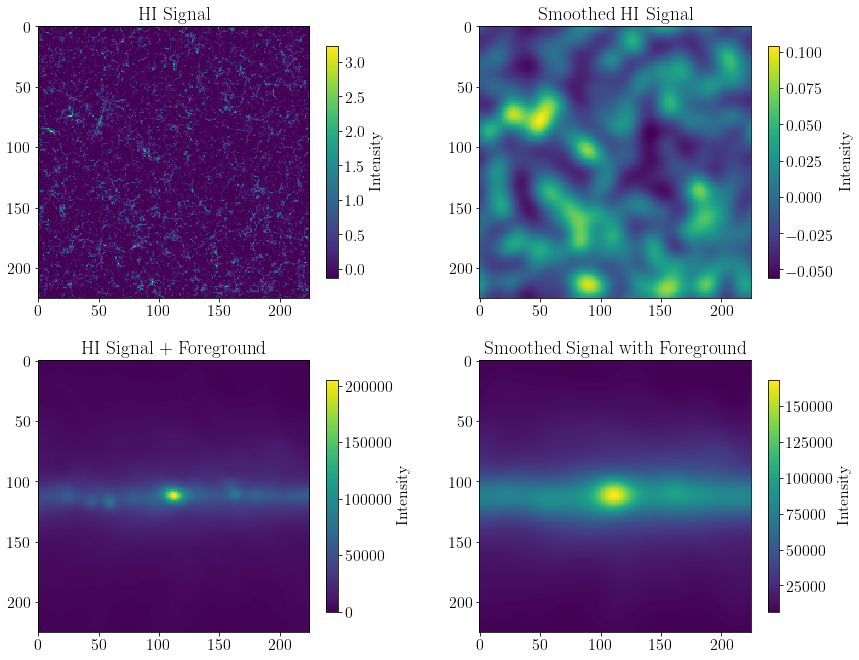

In [20]:
### PLOT SMOOTHED MAPS ### SWAP SO IT MAKES SENSE LOL
fig = plt.figure(figsize=(14,12))
fig.subplots_adjust(wspace=0.3,hspace=0.05)

#plot cosmological HI 
plt.subplot(223)
plt.imshow(T_ALL[:,:,n])
plt.title("HI Signal + Foreground")#HI Signal+ Foreground before smoothing")
plt.colorbar(label = "Intensity", shrink = 0.73)

#plot signal plus foreground
plt.subplot(224)
plt.imshow(smoothed_image)
plt.title("Smoothed Signal with Foreground")#HI Signal+ Foreground after smoothing")
plt.colorbar(label="Intensity", shrink = 0.73)

#plot cosmological HI 
plt.subplot(221)
plt.imshow(T_HI[:,:,n])
plt.title("HI Signal")#HI Signal+ Foreground before smoothing")
plt.colorbar(label = "Intensity", shrink = 0.73)

#plot signal plus foreground
plt.subplot(222)
plt.imshow(smoothed_image1)
plt.title("Smoothed HI Signal")#HI Signal+ Foreground after smoothing")
plt.colorbar(label="Intensity", shrink = 0.73)


#plt.savefig("plots/combo-beam-conv.png")      

The following code saves the smoothed images to a new data cube of the same shape as the original data. This was done so that the foreground methods could also be run on the smoothed data, to investigate how limited resolution impacts the ability to effectively remove foregrounds. 

In [11]:
smoothed = []               #cube of smoothed images of shape: [nz,nx,ny]

for i in range(nz):
    image = T_ALL[:,:,i]
    
    smoothed_image = smoothimage(image,lx,ly,nx,ny,sig)
    smoothed.append(smoothed_image)
    
smoothed = np.array(smoothed)
#reshape smoothed to match shape of T_HI and T_FG
smoothed = np.reshape(smoothed,(nz,nx*ny)) 
smoothed = np.swapaxes(smoothed,0,1)
smoothed = np.reshape(smoothed,[nx,ny,nz]) 

In [13]:
np.save("Data/smoothed-combined.npy",smoothed)